In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import ast
from scipy.stats import weibull_min
from scipy.stats import lognorm, gamma, expon
from statsmodels.tsa.stattools import acf
from dateutil.parser import isoparse
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from striprtf.striprtf import rtf_to_text
from lifelines import KaplanMeierFitter


# Set universal font sizes using rcParams
plt.rcParams['axes.labelsize'] = 15  # For x and y labels
plt.rcParams['xtick.labelsize'] = 14 # For x-ticks
plt.rcParams['ytick.labelsize'] = 14  # For y-ticks
plt.rcParams['legend.fontsize'] = 15  # For legend
plt.rcParams['axes.titlesize'] = 15

In [2]:
def generate_survival_plot(alpine_lifespan, camp_lifespan):
    alpine_data = pd.DataFrame({'lifespan': alpine_lifespan, 'event': np.ones(len(alpine_lifespan))})
    camp_data = pd.DataFrame({'lifespan': camp_lifespan, 'event': np.ones(len(camp_lifespan))})

    alpine_kmf = KaplanMeierFitter()
    alpine_kmf.fit(alpine_data['lifespan'], event_observed=alpine_data['event'], label='Alpine', )

    camp_kmf = KaplanMeierFitter()
    camp_kmf.fit(camp_data['lifespan'], event_observed=camp_data['event'], label='Campaign', )

    plt.figure(figsize=(4, 3))
    alpine_kmf.plot_survival_function(color='coral')
    camp_kmf.plot_survival_function(color='green')
    xticks = [0, 10000, 20000, 30000, 40000]
    xtick_lables = ['0', '10K', '20K', '30K', '40K']
    plt.xticks(xticks, labels=xtick_lables)
    plt.xlabel('Lifespan (hours)')
    plt.ylabel('Survival probability')
    plt.legend()

    plt.savefig('survival_prob.pdf', bbox_inches='tight')

    plt.show()

In [3]:
def convert_plain_to_float(lifespan_plain):
    lifespans_float = [float(x) for x in ast.literal_eval(lifespan_plain.replace(" ", ", "))]
    return lifespans_float

In [4]:
def convert_rtf_to_text(rtf_path):
    try:
        with open(rtf_path, 'r') as file:
            rtf_content = file.read()
        plain_text = rtf_to_text(rtf_content)
        return plain_text
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [5]:
def main():
    #get plain text from input files
    alpine_lifespan_plain = convert_rtf_to_text("poh-lifespan-alpine.rtf")
    camp_lifespan_plain = convert_rtf_to_text("poh-lifespan-campaign.rtf")
    
    #convert plain text to float
    alpine_lifespan = convert_plain_to_float(alpine_lifespan_plain)
    camp_lifespan = convert_plain_to_float(camp_lifespan_plain)
    
    #geberate plot
    generate_survival_plot(alpine_lifespan, camp_lifespan)
        

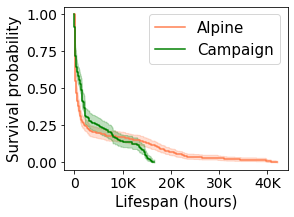

In [6]:
if __name__ == "__main__":
    main()